<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Model performance and diagnostics plots<span class="tocSkip"></span></h1>

This notebook provides model type agnostic capabilities for visualizing model performance and properties weaknesses such as biases and potential omitted variables or variable transformations.

This operates on a dataset containing actuals, predictions, and other variables of interest (e.g. for examining model relationships)

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-performance-and-diagnostics-plots" data-toc-modified-id="Model-performance-and-diagnostics-plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model performance and diagnostics plots</a></span></li><li><span><a href="#Import-key-libraries" data-toc-modified-id="Import-key-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import key libraries</a></span></li><li><span><a href="#Load-dataset-that-contains-a-prediction" data-toc-modified-id="Load-dataset-that-contains-a-prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load dataset that contains a prediction</a></span></li><li><span><a href="#Model-metrics" data-toc-modified-id="Model-metrics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model metrics</a></span><ul class="toc-item"><li><span><a href="#Root-Mean-Squared-Error" data-toc-modified-id="Root-Mean-Squared-Error-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Root Mean Squared Error</a></span></li><li><span><a href="#Mean-Absolute-Error-and-Mean-Absolute-Percentage-Error" data-toc-modified-id="Mean-Absolute-Error-and-Mean-Absolute-Percentage-Error-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mean Absolute Error and Mean Absolute Percentage Error</a></span></li><li><span><a href="#R-squared-and-Explained-Variance" data-toc-modified-id="R-squared-and-Explained-Variance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>R-squared and Explained Variance</a></span></li><li><span><a href="#Relative-errors" data-toc-modified-id="Relative-errors-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Relative errors</a></span></li></ul></li><li><span><a href="#Model-performance-plots" data-toc-modified-id="Model-performance-plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model performance plots</a></span><ul class="toc-item"><li><span><a href="#Actual-vs.-Predicted-Scatterplot" data-toc-modified-id="Actual-vs.-Predicted-Scatterplot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Actual vs. Predicted Scatterplot</a></span></li><li><span><a href="#Actual-vs.-Predicted-by-binned-prediction" data-toc-modified-id="Actual-vs.-Predicted-by-binned-prediction-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Actual vs. Predicted by binned prediction</a></span></li><li><span><a href="#Actual-and-Predicted-vs.-other-continuous-variables" data-toc-modified-id="Actual-and-Predicted-vs.-other-continuous-variables-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Actual and Predicted vs. other continuous variables</a></span></li><li><span><a href="#Actual-and-Predicted-vs.-other-categorical-or-discrete-variables" data-toc-modified-id="Actual-and-Predicted-vs.-other-categorical-or-discrete-variables-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Actual and Predicted vs. other categorical or discrete variables</a></span></li></ul></li><li><span><a href="#Model-performance-by-group" data-toc-modified-id="Model-performance-by-group-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model performance by group</a></span></li></ul></div>

# Import key libraries

In [2]:
# Import key libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

**Import code stored in the utilities folder**

In [3]:
import sys
sys.path.insert(0, "../../utilities")
from model_plots import diagnostics_continuous

# Load dataset that contains a prediction

We load a Pandas dataframe containing the prediction "PredictedPrice". Typically, this prediction is created on the spot from a model. For a model example, make sure to download the 'Regression Modeling templates'

In [4]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
dataset = pd.read_csv("sample_input/car_price_with_prediction.csv", low_memory=False)
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,PredictedPrice
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4/5,Left wheel,Silver,12,8824.699572
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,4/5,Left wheel,Black,8,24521.584963
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4/5,Right-hand drive,Black,2,NaN
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4/5,Left wheel,White,0,8995.986780
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4/5,Left wheel,Silver,4,22010.686186


**Subset dataset to remove missing actuals and predictions**

In [5]:
clean_dataset = dataset.dropna(subset=["Price","PredictedPrice"])

# Model metrics

Most of these metrics can be found here: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

For model specific metrics and data type specific (e.g. time-series) metrics, download the templates for regression modeling and see the respective model notebook.

The way relative metrics are calculated may need to be adjusted to the data situation, e.g. 
* Relative errors to a variable that is always positive and far from zero (e.g. deposit levels, transaction volumes)
    * %-age errors such as MAPE [Less discerning if errors are small relative to a large base]
    * Error / ‘Average absolute change’ or Error / Standard deviation, to compare error to expected moves
* Relative errors to variable that is always positive but can be near zero for some data points
    * Error / ‘Average variable value’, where average variable value represents ‘typical actual level’
    * Error / ‘Average absolute change’ or Error / Standard deviation
* Relative errors to variable that can be both positive and negative
    * Error / ‘Average absolute variable value over relevant period’
    * Error / ‘Average absolute change’ or Error / Standard deviation

## Root Mean Squared Error

Note: A weighted RMSE can be calculated by specifying a 'weight' argument. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
mean_squared_error(y_true = clean_dataset['Price'], y_pred = clean_dataset['PredictedPrice'], squared=False)

17313.080328440537

## Mean Absolute Error and Mean Absolute Percentage Error

Note: Weighted errors can be calculated by specifying a 'weight' argument. See:
* MAE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
* MAPE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error

In [8]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [9]:
mean_absolute_error(y_true = clean_dataset['Price'], y_pred = clean_dataset['PredictedPrice'])

10862.34471933647

In [10]:
mean_absolute_percentage_error(y_true = clean_dataset['Price'], y_pred = clean_dataset['PredictedPrice'])

9.828395481862321

## R-squared and Explained Variance

When the mean error (i.e. average(actual) = average(predicted)) then these two metrics are identical. See here: https://stackoverflow.com/questions/24378176/python-sci-kit-learn-metrics-difference-between-r2-score-and-explained-varian

Note: Weighted errors can be calculated by specifying a 'weight' argument. See:
* R2 score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
* Explained Variance: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score

In [11]:
from sklearn.metrics import r2_score, explained_variance_score

In [12]:
r2_score(y_true = clean_dataset['Price'], y_pred = clean_dataset['PredictedPrice'])

0.20110831569861365

In [13]:
explained_variance_score(y_true = clean_dataset['Price'], y_pred = clean_dataset['PredictedPrice'])

0.20110835807657246

## Relative errors

Here we illustrate a few ways to calculate relative errors, in addition to MAPE introduced earlier

**Mean absolute error relative to standard deviation**
This can be useful for a variable that is either:
* Very large and stable, such that MAPE will be very small and difficult to put into context
* Is close to zero or changes between being positive or negative

In [14]:
mean_absolute_error(y_true = clean_dataset['Price'], y_pred = clean_dataset['PredictedPrice']) / np.std(clean_dataset['Price'])

0.560780866522542

**Mean absolute error relative to average absolute value**
This can be useful for a variable that changes between being positive or negative

In [15]:
mean_absolute_error(y_true = clean_dataset['Price'], y_pred = clean_dataset['PredictedPrice']) / np.mean(abs(clean_dataset['Price']))

0.6279359269953644

# Model performance plots

## Actual vs. Predicted Scatterplot

The simplest way is a **scatter plot** to visualize actuals vs. predicted values. However, it can be challenging to gauge the quality of the model fit if there is substantial noise (random unexplainable residuals), but it nevertheless a good starting point.

Scatterplots can be slow when too many points are plotted. Therefore, it is recommended to sample data if the dataset is too large, as well as to provide the ranges of the data (in case outliers are sampled out)

Sampled 1000 out of 19237 observations


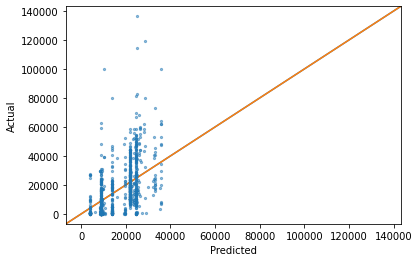

In [16]:
actual = "Price"
predicted = "PredictedPrice"

fig, ax = diagnostics_continuous.act_vs_pred_scatter(dataset, actual, predicted, N = 1000, equalize_axes=True)

## Actual vs. Predicted by binned prediction

This chart buckets the data based on the predicted value (from low to high), and plots a scatterplot of the average actual vs. average predicted in each bucket. This helps make biases in the model more visually clear by smoothing out variation in errors.

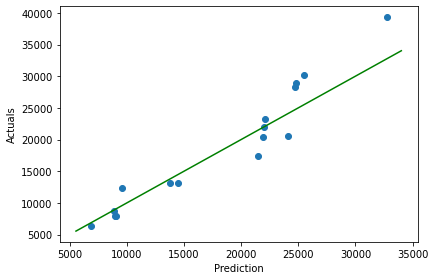

In [17]:
fig, axs, plot_data = diagnostics_continuous.act_vs_pred_plot(used_data = dataset, 
                                                              actual_var = "Price", 
                                                              pred_var = "PredictedPrice", 
                                                              num_buckets=20, 
                                                              with_count = False, 
                                                              with_stdev = False, with_CI = False, lower=-np.inf, upper=np.inf, non_nan = True)

## Actual and Predicted vs. other continuous variables

This chart buckets the data based on the value (from low to high) of any continuous variable, and plots the average actual and average predicted vs. the average value of the continuous variable for each bucket. This identifies biases in the model against the continuous variable to possible identify: 
* Whether the continuous variable should be added to the model (if it is not already)
* Whether a transformation of the variable should be added to the model

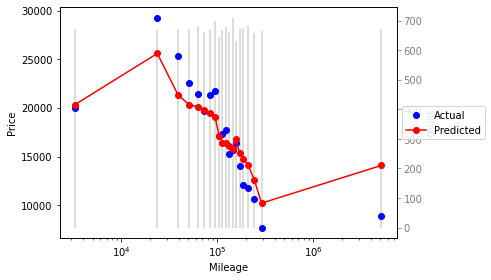

In [23]:
x_variable = "Mileage"

fig, axs, plot_data = diagnostics_continuous.model_comparison_continuous(used_data = dataset, 
                                                                         actual_var = "Price", 
                                                                         pred_var = "PredictedPrice", 
                                                                         x_var = x_variable, 
                                                                         num_buckets=20, 
                                                                         y_scale="linear", x_scale="log",
                                                                         with_count=True, with_stdev = False, with_CI = False,
                                                                         lower=-np.inf, upper=np.inf, non_nan = True)

The red line is the model prediction and the blue points are the actuals. The grey bars indicate the number of observations. In this example, a adjusting the transformation for "Mileage" may help capture the consistent overprediction for high mileage, and underprediction for low mileage

## Actual and Predicted vs. other categorical or discrete variables

This chart buckets the data based on each value of any categorical / discrete variable, and plots the average actual and average predicted for each unique value. This can identify potential biases for certain categories (if this variable is not part of the model).

Use discrete = True for numerical variables if you want to preserve the distance between values on the x-axis.

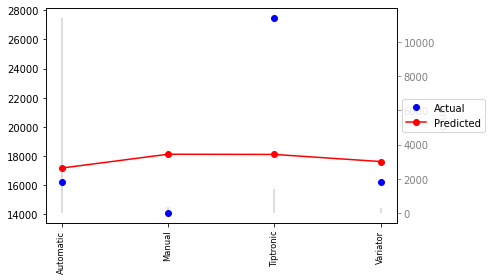

In [24]:
x_variable = "Gear box type"

fig, axs, plot_data = diagnostics_continuous.model_comparison_categorical(used_data = dataset, 
                                                                         actual_var = "Price", 
                                                                         pred_var = "PredictedPrice", 
                                                                         x_var = x_variable, 
                                                                         discrete=False,
                                                                         y_scale="linear", 
                                                                         with_count=True, with_stdev = False, with_CI = False,
                                                                         lower=-np.inf, upper=np.inf, non_nan = True)

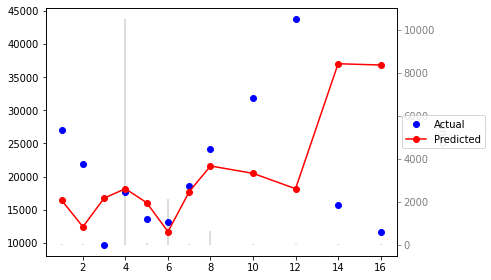

In [25]:
x_variable = "Cylinders"

fig, axs, plot_data = diagnostics_continuous.model_comparison_categorical(used_data = dataset, 
                                                                         actual_var = "Price", 
                                                                         pred_var = "PredictedPrice", 
                                                                         x_var = x_variable, 
                                                                         discrete=True,
                                                                         y_scale="linear", 
                                                                         with_count=True, with_stdev = False, with_CI = False,
                                                                         lower=-np.inf, upper=np.inf, non_nan = True)

# Model performance by group

To identify potential differences in model performance by subpopulation, the plots in the prior section can be compared across subpopulations. If there are major differences by subpopulation, interaction terms may be warranted. 

In [ ]:
TBD